In [6]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [9]:
# generate the data using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [12]:
#the first five elements for each of the variables returned by make_blobs()
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [15]:
# print the label for these variables.
true_labels[:5]

array([1, 0, 2, 2, 2])

In [17]:
#the values for all features must be transformed to the same scale, The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [22]:
# Initiate the KMeans class ith the following arguments:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [24]:
#the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [26]:
#Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():
#The lowest SSE value
kmeans.inertia_

74.57960106819854

In [28]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [30]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [32]:
# the cluster assignments are stored as a one-dimensional NumPy array
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [38]:
# running elbow method to find appropiate number of cluster
kmeans_kwargs = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
#create a empty list to hold the SSE values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

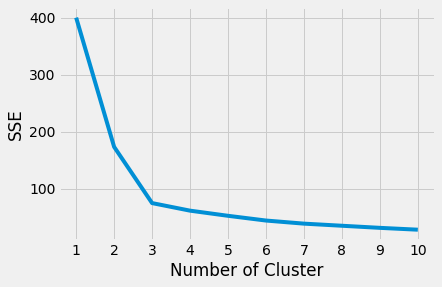

In [49]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")

In [50]:
# Finding the elbow point of the curve.
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [45]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

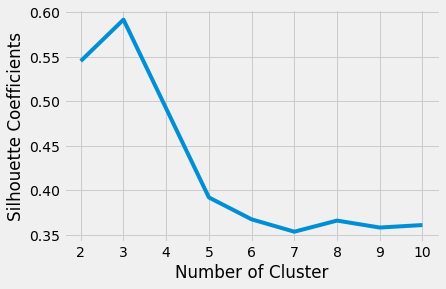

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Coefficients")
plt.show()